In [2]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

Using TensorFlow backend.


In [3]:
colour_labl=pd.read_csv('Desktop/MACHINE LEARNING PROJECT/dataset_AMLS_19-20/cartoon_set/labels.csv',delimiter='\t')
colour_labl.head()
colour_labl.shape[0]

10000

In [4]:
colour_labl=colour_labl['eye_color']
colour_labl.head()


0    1
1    2
2    2
3    2
4    0
Name: eye_color, dtype: int64

In [5]:
from imutils import face_utils
import argparse
import imutils
import dlib
import cv2

In [ ]:
for i in tqdm(range(colour_labl.shape[0])):
    # initialize dlib's face detector (HOG-based) and then create
    # the facial landmark predictor
    detector = dlib.get_frontal_face_detector()
    predictor = dlib.shape_predictor('Desktop/shape_predictor_68_face_landmarks.dat')
    image = cv2.imread("Desktop/MACHINE LEARNING PROJECT/dataset_AMLS_19-20/cartoon_set/img/%d.png" %i)
    gray=cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    rects = detector(gray,1) #detects faces in the image "gray", 1 stands for upsampling image 1 time
    shape = predictor(gray, rect[0]) #get landmarks for 'gray' in box rect[0],which is the only box as there is only 1 face per image
    #shape = face_utils.shape_to_np(shape)
    x1=shape.part(36).x 
    x2=shape.part(39).x 
    y1=shape.part(37).y 
    y2=shape.part(40).y
    lefteye=image[y1:y2,x1:x2]
    try:
        out = cv2.resize(lefteye, (100, 100)) #Resize face so all images have same size
            
        cv2.imwrite('Desktop/MACHINE LEARNING PROJECT/dataset_AMLS_19-20/cartoon_set/train_img/%d.jpg' %(i), out) #Write image
            
            #genders=genders.append(gender_labl[i])
            
    except:
        pass #If error, pass f

In [6]:
from skimage.io import imread
from skimage.io import imshow
from skimage.color import rgb2hsv
import matplotlib
import matplotlib.pyplot as plt


NameError: name 'green_hsv' is not defined

In [ ]:
pic5=imread('Desktop/MACHINE LEARNING PROJECT/dataset_AMLS_19-20/cartoon_set/train_img/%d.jpg' %8) #blue
blue_hsv=rgb2hsv(rgb=pic5)
a=blue_hsv[:,:,0]
a1=np.true_divide(a.sum(1),(a!=0).sum(1))
print('a1=',a1)
am=np.mean(a1)
amm=np.mean(a)
print('am=',am)
print('amm=',amm)

In [22]:
y=list()
features=list()
for i in range(10000):
    try:
        img=imread('Desktop/MACHINE LEARNING PROJECT/dataset_AMLS_19-20/cartoon_set/train_img/%d.jpg' %(i))
        pic_hsv=rgb2hsv(rgb=img)
        x=pic_hsv[:,:,0]
        #x1=np.true_divide(x.sum(1),(x!=0).sum(1))
        X=np.mean(x)
        features.append(X)
        y.append(colour_labl[i])
    except:
        pass

In [23]:
labels=pd.DataFrame(colour_labl)

In [24]:
labels['HSV mean']=features

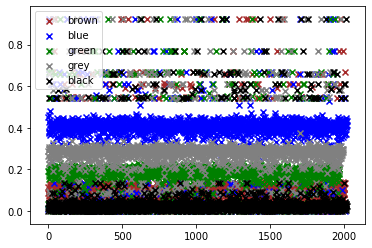

In [25]:
x1=np.linspace(start=0, stop=len(labels[labels['eye_color']==0])-1, num=len(labels[labels['eye_color']==0]), dtype=int)
x2=np.linspace(start=0, stop=len(labels[labels['eye_color']==1])-1, num=len(labels[labels['eye_color']==1]), dtype=int)
x3=np.linspace(start=0, stop=len(labels[labels['eye_color']==2])-1, num=len(labels[labels['eye_color']==2]), dtype=int)
x4=np.linspace(start=0, stop=len(labels[labels['eye_color']==3])-1, num=len(labels[labels['eye_color']==3]), dtype=int)
x5=np.linspace(start=0, stop=len(labels[labels['eye_color']==4])-1, num=len(labels[labels['eye_color']==4]), dtype=int)
plt.scatter(x1[:],labels[labels['eye_color']==0]['HSV mean'],c='brown', marker='x', label='brown')
plt.scatter(x2[:],labels[labels['eye_color']==1]['HSV mean'],c='blue', marker='x', label='blue')
plt.scatter(x3[:],labels[labels['eye_color']==2]['HSV mean'],c='green', marker='x', label='green')
plt.scatter(x4[:],labels[labels['eye_color']==3]['HSV mean'],c='grey', marker='x', label='grey')
plt.scatter(x5[:],labels[labels['eye_color']==4]['HSV mean'],c='black', marker='x', label='black')
plt.legend(loc='upper left')
plt.show()

1785
1598
1571
1545
1808


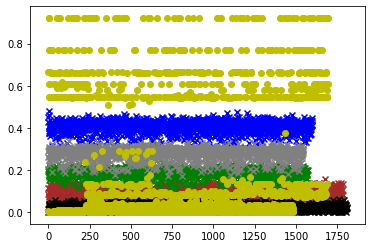

In [27]:
import itertools

colours = ['brown', 'blue', 'green', 'grey' , 'black']
i=0
outliers=list()
X1=list()
for colour in colours:
    A=labels[labels['eye_color']==i]['HSV mean']
    X=A.to_numpy()
    Q1 = np.nanquantile(X,0.25)
    Q3 = np.nanquantile(X,0.75)
    IQR = Q3-Q1
    Minimum = Q1-1.5*IQR
    Maximum = Q3+1.5*IQR
    outlier_by_IQR_Score=X[(X<Minimum) | (X>Maximum)]
    X=X.tolist()
    for outlier in outlier_by_IQR_Score:
        X.remove(outlier)
    outliers.append(outlier_by_IQR_Score) 
    X1.append(X)
    x1=np.linspace(start=0, stop=len(X)-1, num=len(X), dtype=int)
    print(len(X))
    plt.scatter(x1,X,c=colour, marker='x', label=colour)
    i=i+1

outliers_list=list(itertools.chain.from_iterable(outliers))
y1=np.linspace(start=0, stop=len(outliers_list)-1, num=len(outliers_list), dtype=int)
plt.scatter(y1,outliers_list,c='y',marker='o',label=outliers)
plt.show()

In [28]:
import itertools
X1_list=list(itertools.chain.from_iterable(X1))
outliers_list=list(itertools.chain.from_iterable(outliers))

In [29]:
k=len(X1_list)
y=np.zeros((k,2))
ends=[1785,1598,1571,1545,1808]
i=0
j=0
for end in ends:
    y[i:i+end,0]=int(j)
    y[i:i+end,1]=X1_list[i:i+end]
    j=j+1
    i=i+end


In [30]:
np.random.shuffle(y)

In [31]:
Y=pd.DataFrame(data=y)

In [32]:
Y.rename(columns={0: "eye_colour", 1: "HSV mean"})

,eye_colour,HSV mean
0,4.0,0.015560
1,4.0,0.031879
2,0.0,0.092037
3,3.0,0.301515
4,3.0,0.258839
...,...,...
8302,3.0,0.315281
8303,4.0,0.032436
8304,0.0,0.070255
8305,1.0,0.422923


1785
1598
1571
1545
1808


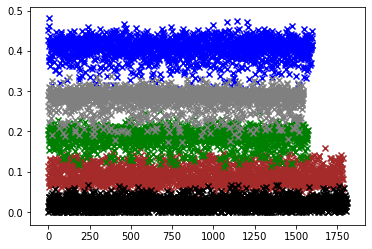

In [33]:
colours = ['brown', 'blue', 'green', 'grey' , 'black']
i=0
outliers=list()
X1=list()
label=labels
for colour in colours:
    A=labels[labels['eye_color']==i]['HSV mean']
    X=A.to_numpy()
    Q1 = np.nanquantile(X,0.25)
    Q3 = np.nanquantile(X,0.75)
    IQR = Q3-Q1
    Minimum = Q1-1.5*IQR
    Maximum = Q3+1.5*IQR
    outlier_by_IQR_Score=X[(X<Minimum) | (X>Maximum)]
    X=X.tolist()
    A=pd.DataFrame(A)
    for outlier in outlier_by_IQR_Score:
        X.remove(outlier)
        k=A.loc[A['HSV mean']==outlier].index[0]
        A=A.drop([k])
        label=label.drop([k])
    outliers.append(outlier_by_IQR_Score) 
    X1.append(X)
    x1=np.linspace(start=0, stop=len(X)-1, num=len(X), dtype=int)
    print(len(X))
    plt.scatter(x1,X,c=colour, marker='x', label=colour)
    i=i+1

In [34]:
X=label['HSV mean']
y=label['eye_color']
X=X.to_numpy()
X=X.reshape(8307,1)
y=y.to_numpy()
y=y.tolist()

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

NameError: name 'MinMaxScaler' is not defined

In [38]:
from sklearn import svm, datasets
from sklearn.svm import SVC
from sklearn.utils import shuffle
from sklearn.metrics import classification_report,accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV

In [39]:
scaler = MinMaxScaler() # This estimator scales and translates each feature individually such that it is in the given range on the training set, default between(0,1)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [40]:
hyper_para=[{'kernel':['rbf'],'gamma':[0.001, 0.01, 0.1, 1, 10 ,100],'C':[0.001, 0.01, 0.1, 1, 10 ,100,1000]}]
clf = GridSearchCV(estimator=svm.SVC(), param_grid=hyper_para,cv=5, n_jobs=-1)
clf.fit(X_train,y_train)
print('Best score:', clf.best_score_) 

Best score: 0.9502923976608187


In [41]:
print('Best C:',clf.best_estimator_.C) 
print('Best Gamma:',clf.best_estimator_.gamma)

Best C: 10
Best Gamma: 10


In [43]:
from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(svm.SVC(C=10,kernel='rbf',gamma=10), 
                                                        X_train, 
                                                        y_train,
                                                        # Number of folds in cross-validation
                                                        cv=5,
                                                        # Evaluation metric
                                                        scoring='accuracy',
                                                        # Use all computer cores
                                                        n_jobs=-1, 
                                                        # 10 different sizes of the training set
                                                        train_sizes=np.linspace(0.01, 1.0, 10))

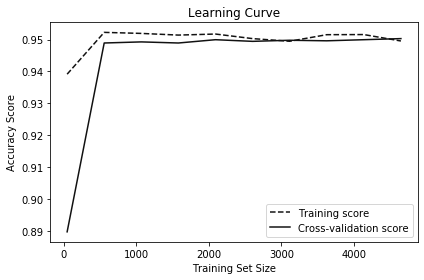

In [44]:
# Create means and standard deviations of training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Create means and standard deviations of test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Draw lines
plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

# Create plot
plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

In [45]:
def SVM(x_train,y_train, x_test):
    model = svm.SVC(C=10,kernel='rbf',gamma=10)
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    return y_pred
# Scikit learn library results
y_pred=SVM(X_train,y_train, X_test)
print(accuracy_score(y_test,y_pred))

0.9502607300441236
